In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os
import pandas as pd
import numpy as np
from keras.utils import np_utils
from pathlib import Path
import tensorflow
from tensorflow.keras.preprocessing import image
from PIL import ImageOps
import matplotlib.pyplot as plt
import tensorflow_hub as hub

In [ ]:
p = Path('/content/drive/MyDrive/Edited_Data/')
dirs = p.glob('*')

In [ ]:
image_data = []
image_path = []
labels = []
label_dict = {"10_Front":0,"10_Back":1 ,"10_new_Front":2,"10_new_Back":3,"20_Front":4 ,"20_Back":5 ,"20_new_Front":6,"20_new_Back":7,"50_Front":8 , "50_Back":9 ,"50_new_Front":10,"50_new_Back":11,"100_Front":12 , "100_Back":13,"100_new_Front":14,"100_new_Back":15,"200_Front":16,"200_Back":17,"500_Front":18,"500_Back":19,"2000_Front":20,"2000_Back":21}
dict_label = {0:"10_Front",1:"10_Back",2:"10_new_Front",3:"10_new_Back",4:"20_Front",5:"20_Back",6:"20_new_Front",7:"20_new_Back",8:"50_Front" , 9:"50_Back" ,10:"50_new_Front",11:"50_new_Back",12:"100_Front" ,13:"100_Back",14:"100_new_Front",15:"100_new_Back",16:"200_Front",17:"200_Back",18:"500_Front",19:"500_Back",20:"2000_Front",21:"2000_Back"}
for folder_dir in dirs :
    label=str(folder_dir).split('/')[-1]
    folder=label
    cnt = 0
    print(folder)
    for img_path  in folder_dir.glob("*.jpg"):
        org = image.load_img(img_path,target_size =(128,128))
        img_array = image.img_to_array(org)
        image_data.append(img_array)
        labels.append(label_dict[label])
        cnt += 1
    print(cnt)

20_Back
589
20_new_Front
568
20_Front
623
50_Back
588
50_Front
654
50_new_Front
561
500_Back
595
50_new_Back
592
20_new_Back
594
500_Front
605
200_Front
554
10_Back
642
10_Front
539
10_new_Back
580
10_new_Front
551
100_Back
614
100_Front
584
100_new_Back
573
100_new_Front
608
200_Back
559


In [ ]:
import random
combined = list(zip(image_data,labels))
random.shuffle(combined)
image_data[:],labels[:]= zip(*combined)

In [ ]:
labels[:5]

[15, 19, 2, 0, 8]

In [ ]:
# Normalization
X_Train = np.array(image_data)/255.0
Y_Train = np.array(labels)
Y_Train = np_utils.to_categorical(Y_Train,22)
print(X_Train.shape,Y_Train.shape)

(11773, 128, 128, 3) (11773, 22)


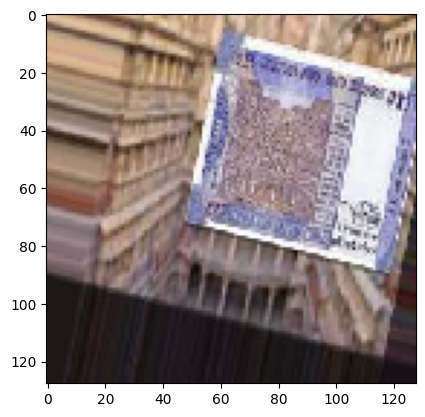

In [ ]:
plt.imshow(X_Train[0])

In [ ]:
# Create MobileNet Model

In [ ]:
from keras.applications import MobileNet
from keras.optimizers import Adam
from keras.layers import *

In [ ]:
MobileNetV2=tf.keras.applications.mobilenet_v2.MobileNetV2
model_arch=MobileNetV2()
model_arch.summary()

14536120/14536120 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
              

In [ ]:
model=tf.keras.applications.MobileNetV2(include_top=False, weights='imagenet',input_shape=(128,128,3), pooling='max')

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_2[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][

In [ ]:
from keras.models import Model

In [ ]:
fc1 = Dense(256,activation='relu')(model.output)
d1 = Dropout(0.5)(fc1)
fc2 = Dense(22,activation='softmax')(d1)
new_model = Model(inputs = model.input,outputs= fc2)
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_2[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][0]']           

In [ ]:
adam=Adam(learning_rate=0.0002)
new_model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

In [ ]:
for i in range(151):
  new_model.layers[i].trainable=False
new_model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

In [ ]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_2[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][0]']           

In [ ]:
hist = new_model.fit(X_Train,Y_Train,shuffle=True,batch_size=256,epochs=32,validation_split=0.40)

Epoch 1/32
28/28 [==============================] - 214s 8s/step - loss: 0.0497 - accuracy: 0.9878 - val_loss: 0.4817 - val_accuracy: 0.8484
Epoch 2/32
28/28 [==============================] - 192s 7s/step - loss: 0.0432 - accuracy: 0.9912 - val_loss: 0.4870 - val_accuracy: 0.8512
Epoch 3/32
28/28 [==============================] - 189s 7s/step - loss: 0.0435 - accuracy: 0.9899 - val_loss: 0.4799 - val_accuracy: 0.8524
Epoch 4/32
28/28 [==============================] - 190s 7s/step - loss: 0.0405 - accuracy: 0.9907 - val_loss: 0.4829 - val_accuracy: 0.8469
Epoch 5/32
28/28 [==============================] - 191s 7s/step - loss: 0.0381 - accuracy: 0.9931 - val_loss: 0.4723 - val_accuracy: 0.8537
Epoch 7/32
 6/28 [=====>........................] - ETA: 1:24 - loss: 0.0375 - accuracy: 0.9928

In [ ]:
from tensorflow.keras.models import load_model
new_model.save('/content/drive/MyDrive/save_model/currency_9.h5')

In [ ]:
test = X_Train[34]
test = test.reshape(1,128,128,3)
print(test.shape)

In [ ]:
re=new_model.predict(test)
re = np.argmax(re)
sre = dict_label[re]
print(sre)

In [ ]:
plt.imshow(X_Train[34])

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(new_model)
tflite_model = converter.convert()

In [ ]:
with open('Edit_model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))